# Introduction to the NeuroInformatics Platform - FENS 2016 - Part 1

# Atlases




## Querying for data available about the thalamus from the NIP website (https://nip.humanbrainproject.eu/atlas/)
Different atlases can be selected and viewed interactively through the web interface.

<img src="https://s31.postimg.org/vv2w9y5fv/Screenshot_from_2016_06_22_16_35_14.png" width="100%" height="100%"></img>

<img src="https://s32.postimg.org/oxss1ygxx/Screenshot_from_2016_06_22_16_36_39.png" width="100%" height="100%"></img>





<BR><BR>
----------------
----------------
<BR><BR>



## Some atlas can also be queried through the Voxel Atlas API which has a Swagger-based interface (https://nip.humanbrainproject.eu/api/analytics/swagger/index.html)

<BR><BR>

<img src="https://s32.postimg.org/sviruny45/Screenshot_from_2016_06_22_16_45_11.png" width="100%" height="100%"></img>



<BR><BR>
----------------
----------------
<BR><BR>

## The atlases accessible from the Voxel Atlas API can be queried in Python too, through the REST service...


In [1]:
# Installation of the pySciGraph toolbox which simplifies 
# interfacing the SciGraph-based ontologies through 
# Python.
!pip install --upgrade gitpython --user
import sys, os
if not os.path.isdir("py-SciGraph"):
    !git clone https://github.com/SciGraph/py-SciGraph.git
sys.path.append(os.path.join(os.getcwd(), "py-SciGraph"))

## __init__.py files are not already present in folders so Python has difficulty to
## recognize these folders as packages. So we add these files...
with open(os.path.join(os.getcwd(), "py-SciGraph/scigraph/__init__.py"), "w") as f: pass
with open(os.path.join(os.getcwd(), "py-SciGraph/scigraph/api/__init__.py"), "w") as f: pass
with open(os.path.join(os.getcwd(), "py-SciGraph/scigraph/model/__init__.py"), "w") as f: pass    
from scigraph.api.SciGraph import SciGraph

# Defining the end-point for querying the REST service of the Voxel Atlas API.
base = "https://nip.humanbrainproject.eu/api/analytics"

# Defining a function to display json strings nicely
import json
def jsonPrettyPrint(jsonStr):
    print json.dumps(jsonStr, sort_keys=True,
                  indent=4, separators=(',', ': '))


Requirement already up-to-date: gitpython in ./.local/lib/python2.7/site-packages
Requirement already up-to-date: gitdb>=0.6.4 in ./.local/lib/python2.7/site-packages (from gitpython)
Requirement already up-to-date: smmap>=0.8.5 in ./.local/lib/python2.7/site-packages (from gitdb>=0.6.4->gitpython)
You are using pip version 8.1.1, however version 8.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Listing the atlases available through the Voxel Atlas API...

In [2]:
import pandas as pd

sg = SciGraph(base + "/atlas/releases")

atlases = {}
for item in sg.get_response().json():
    for key, val in item.iteritems():
        if key in atlases:
            atlases[key].append(val)
        else:
            atlases[key] = [val]
            
atlases = pd.DataFrame(atlases)
atlases

,data_types,hbp_release,id,name,resolution,species,template_source
0,[brain_regions],2016-05-23,EE5F4B50-0C6D-11E6-A837-0800200C9A66,Hippocampus3D,16,rat,Hippocampus3D
1,"[nissl, gray_levels, brain_regions]",2016-01-12,6C4F0E89-6D2A-46D4-B4D5-B2BE4840F87D,Mouse 25 micron CCFv2,25,mouse,Allen mouse brain CCFv2
2,"[nissl, gray_levels, brain_regions]",2016-01-12,1192CEAC-17C5-4A74-B88C-48065C048678,Mouse 25 micron CCFv3,25,mouse,Allen mouse brain CCFv3


...which can be summarized in a more graphical way by the following chart:
<img src="https://s32.postimg.org/ftnz5r99x/Screen_Shot_2016_06_26_at_13_07_46.png" width="40%" height="40%"></img>





## Listing the available the filters available to query the data...

In [3]:
sg = SciGraph(base + "/atlas/filters")

filters = {}
for item in sg.get_response().json():
    for key, val in item.iteritems():
        if key in filters:
            filters[key].append(val)
        else:
            filters[key] = [val]
            
filters = pd.DataFrame(filters)
filters

,description,filter,type,values
0,The data modality,data_type,string,"[nissl, gray_levels, brain_regions]"
1,The region of the brain a voxel is located into,brain_region,string,"[cortex, hippocampal region]"


## Searching for the ID identifying the hippocampal region in the "Mouse 25 micron CCFv3" atlas...

In [4]:
mouseCCFv3AtlasId = atlases["id"][2] 
brainRegionFilter = filters["filter"][1]
searchKey         = "hippocampal region"

query = base + "/atlas/releases/" + mouseCCFv3AtlasId + "/filters/" \
        + brainRegionFilter + "/search/" + searchKey
print "query: " + query

sg = SciGraph(query)

jsonPrettyPrint(sg.get_response().json())
regionID = sg.get_response().json()[0][0]

query: https://nip.humanbrainproject.eu/api/analytics/atlas/releases/1192CEAC-17C5-4A74-B88C-48065C048678/filters/brain_region/search/hippocampal region
[
    [
        "1080",
        "Hippocampal region",
        "HIP"
    ]
]


## Getting URL for downloading data from the "Mouse 25 micron CCFv3" atlas for the hippocampal region...

In [5]:
sg = SciGraph(base + "/atlas/releases/" + mouseCCFv3AtlasId \
              + "/data?brain_region=" + regionID)
jsonPrettyPrint(sg.get_response().json())

[
    {
        "atlas_id": "1192CEAC-17C5-4A74-B88C-48065C048678",
        "data_type": "gray_levels",
        "url": "http://nip.humanbrainproject.eu:80/api/analytics/atlas/download?uri=1192CEAC-17C5-4A74-B88C-48065C048678/gray_levels/brain_region/1080.nrrd"
    },
    {
        "atlas_id": "1192CEAC-17C5-4A74-B88C-48065C048678",
        "data_type": "brain_regions",
        "url": "http://nip.humanbrainproject.eu:80/api/analytics/atlas/download?uri=1192CEAC-17C5-4A74-B88C-48065C048678/brain_regions/brain_region/1080.nrrd"
    },
    {
        "atlas_id": "1192CEAC-17C5-4A74-B88C-48065C048678",
        "data_type": "nissl",
        "url": "http://nip.humanbrainproject.eu:80/api/analytics/atlas/download?uri=1192CEAC-17C5-4A74-B88C-48065C048678/nissl/brain_region/1080.nrrd"
    }
]


## Displaying a the Nissl staining and the mask of the brain region, both filtered such that only voxels belonging to the hippocampal region are non-null...

In [6]:
brainRegionURL = sg.get_response().json()[1]["url"]
nisslURL       = sg.get_response().json()[2]["url"]

In [7]:
# Installation of the pyNRRD toolbox which will be useful to work with data 
# files donwloaded from the atlas...
!pip install --upgrade pynrrd --user
import nrrd

# Loading matplotlib to display the data that we will fetch from the atlas...
%matplotlib notebook
import matplotlib.pylab as plt

def displayAtlasData(nisslURL, brainRegionURL):
    nisslLocalFileName = "nissl.nrrd"
    brainRegionLocalFileName = "brainRegion.nrrd"

    # Linux command-line instruction to download the files
    # from the URL obtained through our queries...
    !wget -O $nisslLocalFileName $nisslURL
    !wget -O $brainRegionLocalFileName $brainRegionURL

    nisslVoxels, nisslMetadata = nrrd.read(nisslLocalFileName)
    brainRegionVoxels, brainRegionMetadata = nrrd.read(brainRegionLocalFileName)

    cmap = plt.get_cmap('gray_r')

    fig, axes = plt.subplots(1, 2, sharex=True, sharey=True)
    axes[0].imshow(nisslVoxels[:, :, 200], cmap=cmap)
    axes[1].imshow(brainRegionVoxels[:, :, 200].astype(bool), 
                   interpolation='nearest', cmap=cmap)


Requirement already up-to-date: pynrrd in ./.local/lib/python2.7/site-packages
Requirement already up-to-date: numpy in ./.local/lib/python2.7/site-packages (from pynrrd)
You are using pip version 8.1.1, however version 8.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


/home/jupyter/.local/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


--2016-06-28 18:07:24--  http://nip.humanbrainproject.eu/api/analytics/atlas/download?uri=1192CEAC-17C5-4A74-B88C-48065C048678/nissl/brain_region/1080.nrrd
Resolving nip.humanbrainproject.eu (nip.humanbrainproject.eu)... 192.33.211.8
Connecting to nip.humanbrainproject.eu (nip.humanbrainproject.eu)|192.33.211.8|:80... connected.
HTTP request sent, awaiting response... 301 Redirect
Location: https://nip.humanbrainproject.eu/api/analytics/atlas/download?uri=1192CEAC-17C5-4A74-B88C-48065C048678/nissl/brain_region/1080.nrrd [following]
--2016-06-28 18:07:24--  https://nip.humanbrainproject.eu/api/analytics/atlas/download?uri=1192CEAC-17C5-4A74-B88C-48065C048678/nissl/brain_region/1080.nrrd
Connecting to nip.humanbrainproject.eu (nip.humanbrainproject.eu)|192.33.211.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7601788 (7.2M) [application/octet-stream]
Saving to: ‘nissl.nrrd’

100%[======================================>] 7,601,788   --.-K/s   in 0.1s    

2016

<IPython.core.display.Javascript object>


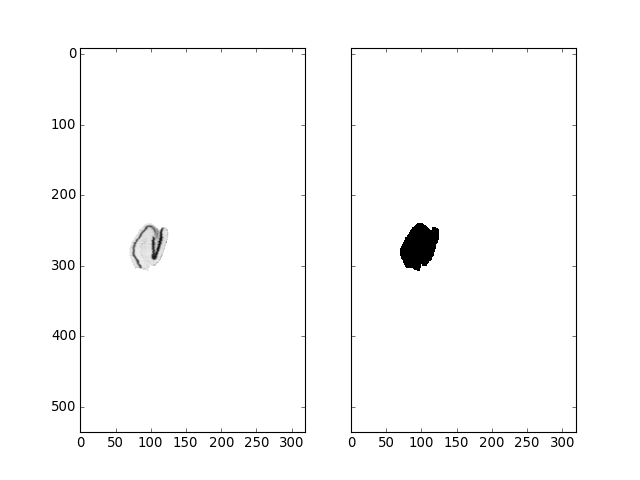

In [8]:
displayAtlasData(nisslURL, brainRegionURL)